In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

### Western Electric Rules

Rule 1: Any single data point falls outside the 3σ-limit from the centerline (i.e., any point that falls outside Zone A, beyond either the upper or lower control limit)

Rule 2: Two out of three consecutive points fall beyond the 2σ-limit (in zone A or beyond), on the same side of the centerline

Rule 3: Four out of five consecutive points fall beyond the 1σ-limit (in zone B or beyond), on the same side of the centerline.

Rule 4	NINE consecutive points fall on the same side of the centerline (in zone C or beyond)

In [2]:
def rando():
    theNum = np.random.randint(50,100)
    return theNum

In [3]:
def testRule1(arr,newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    sigUp = themean + sd*3
    sigDown = themean - sd*3
    if newNum > sigUp:
        print(f"Rule 1 Violation. Upper Control Limit (UCL -- mean + 3SD) is {round(sigUp,1)}")
        proceed(newNum)
    elif newNum < sigDown:
        print(f"Rule 1 Violation. Lower Control Limit (LCL mean - 3SD) is {round(sigDown,1)}.")
        proceed(newNum)
    else:
        myArr.append(newNum)
        print("New datum added to list")
        print(f"New array: {myArr}")
    keepOn = input("Continue with monitoring (y/n)? \n")
        
    

In [5]:
def testRule1b(obj,newNum, mean, sd):
    sigUp = mean + sd*3
    sigDown = mean - sd*3
    code = (newNum > sigUp) or (newNum < sigDown)
    obj['format_1'] = np.append(obj['format_1'],code)
    return

In [6]:
def testRule2b(obj, newNum, mean, sd):
    twoSigUp = mean + sd*2
    twoSigDown = mean - sd*2
    temp_clipped = obj['all_vals'][-2:]
    temp_clipped = np.append(temp_clipped,newNum)
    above2 = temp_clipped > twoSigUp
    below2 = temp_clipped < twoSigDown
    code = (above2.sum(axis=0) >= 2) or (below2.sum(axis=0) >= 2)
    obj['format_2'] = np.append(obj['format_2'],code)
    return    

In [7]:
def testRule3b(obj, newNum, mean, sd):
    oneSigUp = mean + sd
    oneSigDown = mean - sd
    temp_clipped = obj['all_vals'][-5:]
    temp_clipped = np.append(temp_clipped,newNum)
    above1 = temp_clipped > oneSigUp
    below1 = temp_clipped < oneSigDown
    code = (above1.sum(axis=0) >= 4) or (below1.sum(axis=0) >= 4)
    obj['format_3'] = np.append(obj['format_3'],code)
    return

In [8]:
def testRule4b(obj, newNum, mean):
    temp_clipped = obj['all_vals'][-8:]
    temp_clipped = np.append(temp_clipped,newNum)
    above = temp_clipped > mean
    below = temp_clipped < mean
    code = (above.sum(axis=0) >= 9) or (below.sum(axis=0) >= 9)
    obj['format_4'] = np.append(obj['format_4'],code)
    return

In [9]:
def violations(obj,datum):
    
    theMean = np.mean(obj['all_vals'])
    sd = np.std(obj['all_vals'])
    testRule1b(obj,datum, theMean, sd)
    testRule2b(obj,datum, theMean, sd)
    testRule3b(obj,datum, theMean, sd)
    testRule4b(obj,datum, theMean)
    return

In [10]:
def assign_datum(obj,datum = None):
    if(datum is None):
        datum = rando()
    violations(obj,datum)
    obj['all_vals'] = np.append(obj['all_vals'],datum)
    print(obj['all_vals'])
    print(obj['format_4'])
    print(obj['format_3'])
    print(obj['format_2'])
    print(obj['format_1'])
    return
    

In [11]:
trendObj = {'all_vals': np.random.randint(50, 100, size=100),
            'format_1': np.zeros(100),
            'format_2': np.zeros(100),
            'format_3': np.zeros(100),
            'format_4': np.zeros(100),
           }


In [56]:
#Return the value's index if rule has been violated.  This will be used for formatting.
def format_arr(rule):
    rule_arr = 'format_' + str(rule)
    return [index for index,val in enumerate(trendObj[rule_arr]) if val]


In [53]:
assign_datum(trendObj,91)

[ 78  66  78  88  98  66  56  99  60  80  68  66  57  81  67  83  85  65
  89  64  90  96  82  97  91  93  66  74  52  96  87  64  93  74  57  95
  73  96  70  80  54  70  98  88  92  79  83  89  93  50  88  98  76  88
  59  70  51  70  78  82  75  81  92  85  65  60  63  88  70  58  56  55
  50  79  67  56  77  67  78  80  50  62  71  95  54  90  61  54  62  80
  81  93  68  53  51  54  72  86  66  68  54  50  95  71 130  80  81  84
  80  80  80  80  80  44  44  91  91  91  91  91  91  91  91  91  91  91
  91]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 

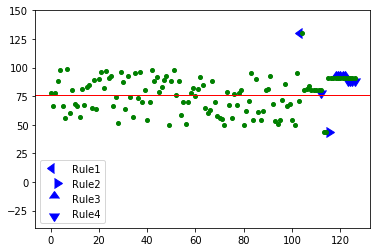

In [54]:
#Plot all values and the formatting arrays to show violations
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(1), ls="", marker=8, label="Rule1", markersize=10.0)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(2), ls="", marker=9, label="Rule2", markersize=10.0)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(3), ls="", marker=10, label="Rule3", markersize=10.0)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(4), ls="", marker=11, label="Rule4", markersize=10.0)
plt.plot(trendObj['all_vals'], color='green', ls="", marker="o", markersize=4.0)
plt.axhline(y=np.mean(trendObj['all_vals']), linewidth=1, color='r')
plt.legend()
plt.ylim(-40, 150)
plt.show()

In [22]:
def proceed(num):
    while True:
        result = input("Add to data set? (y/n) \n")
        if result.lower() not in ('y','n'):
            print('Sorry, not a valid response')
            continue
        else:
            break
    if result == 'y':
        myArr.append(num)
        print("New datum added to list")
     
    

In [ ]:
keepGoing = True
while keepGoing:
    question = input("Should I keep going? \n")
    if question == 'n':
        print("Ok, thanks for playing!")
        keepGoing = False